In [1]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, RocCurveDisplay

In [2]:
def sanitize(df: pd.DataFrame) -> pd.DataFrame:
    df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked_')], axis=1)
    df = pd.concat([df, pd.get_dummies(df['Sex'], prefix='Sex_')], axis=1)

    df = df.drop(['PassengerId', 'Cabin', 'Embarked', 'Sex', 'Name', 'Ticket'], axis=1)

    return df

In [3]:
df = pd.read_csv('data/titanic/train.csv')
df = sanitize(df)

df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S,Sex__female,Sex__male
0,0,3,22.0,1,0,7.2500,False,False,True,False,True
1,1,1,38.0,1,0,71.2833,True,False,False,True,False
2,1,3,26.0,0,0,7.9250,False,False,True,True,False
3,1,1,35.0,1,0,53.1000,False,False,True,True,False
4,0,3,35.0,0,0,8.0500,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,False,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True,True,False
888,0,3,NaN,1,2,23.4500,False,False,True,True,False
889,1,1,26.0,0,0,30.0000,True,False,False,False,True


In [4]:
train_X = df.drop(['Survived'], axis=1)
train_y = df['Survived']

test_X = sanitize(pd.read_csv('data/titanic/test.csv') )
test_y = pd.read_csv('data/titanic/gender_submission.csv')['Survived']

In [5]:
model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1)
model.fit(train_X, train_y)

y_pred = model.predict(test_X)

acc = accuracy_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

print(f'Accuracy: {acc}, F1: {f1}')

Accuracy: 0.8277511961722488, F1: 0.7615894039735099


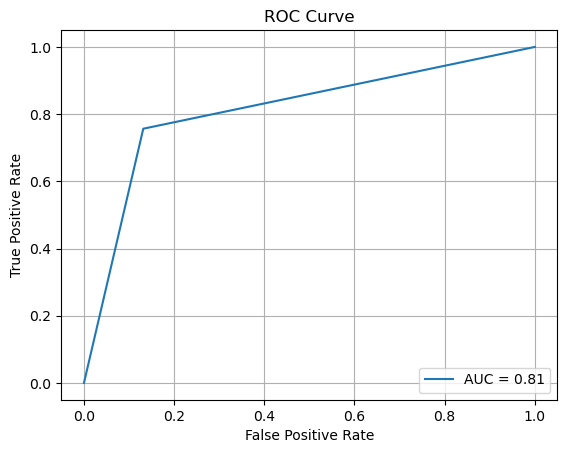

In [6]:
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

display.plot()
plt.title('ROC Curve')
plt.grid()
plt.show()